## Main Libraries

In [3]:
import numpy as np
from scipy.stats import binom

import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'18',
          'xtick.labelsize':'16',
          'ytick.labelsize':'16',
          'font.size':'18',
          'legend.fontsize':'medium',
          'lines.linewidth':'2',
          'font.weight':'normal',
          'lines.markersize':'12'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Single Collection: Emre Gursoy et al (2022) "An Adversarial Approach to Protocol Analysis and Selection in Local Differential Privacy"

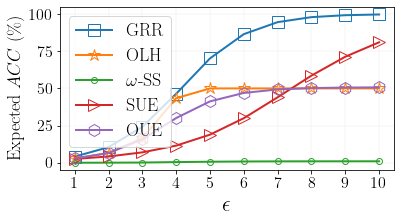

In [4]:
def ACC_GRR(eps, k):
    return  np.exp(eps)/(np.exp(eps)+k - 1) * 100

def ACC_OLH(eps, k):
    return  1 / (2 * max(k/(np.exp(eps)+1) ,1) ) * 100

def ACC_SS(eps, k):
    omega = max(np.rint(k / (np.exp(eps)+1)), 1)
    return np.exp(eps) / ( omega * np.exp(eps) + k - omega)

def ACC_SUE(eps, k):
    val = 1 / (k * (np.exp(eps/2)+1)) * (np.exp(eps/2)/(np.exp(eps/2)+1))**(k-1) + sum([ (np.exp(eps/2) / ((np.exp(eps/2)+1)*i)) * binom.pmf(k=i-1, n=k-1, p=1/(np.exp(eps/2)+1)) for i in range(1, k+1)])
    return val * 100

def ACC_OUE(eps, k):
    val = 1 / (2*k) * (np.exp(eps)/(np.exp(eps)+1))**(k-1) + sum([ (1 / (2*i)) * binom.pmf(k=i-1, n=k-1, p=1/(np.exp(eps)+1)) for i in range(1, k+1)])
    return val * 100

k = 64
lst_eps = range(1,11)
plt.figure(figsize=(6, 3))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.1)
plt.plot([ACC_GRR(eps, k) for eps in lst_eps], label='GRR', marker='s', markerfacecolor='none')
plt.plot([ACC_OLH(eps, k) for eps in lst_eps], label='OLH', marker='*', markerfacecolor='none')
plt.plot([ACC_SS(eps, k) for eps in lst_eps], label='$\omega$-SS', marker='.', markerfacecolor='none')
plt.plot([ACC_SUE(eps, k) for eps in lst_eps], label='SUE', marker='>', markerfacecolor='none')
plt.plot([ACC_OUE(eps, k) for eps in lst_eps], label='OUE', marker='h', markerfacecolor='none')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.xlabel('$\epsilon$', fontsize=22)
plt.ylabel('Expected $ACC$ (\%)', fontsize=18)
plt.legend(loc='upper left')
plt.legend()
plt.show()

## Multiple Collections (Ours): Uniform Privacy Metric

In [5]:
def ACC_U_GRR(eps, lst_k, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for k in lst_ns_k:
            lst_acc.append(np.exp(eps)/(np.exp(eps) + k - 1))            
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_U_OLH(eps, lst_k, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for k in lst_ns_k:
            lst_acc.append(1 / (2 * max(k/(np.exp(eps)+1) ,1) ))
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_U_SS(eps, lst_k, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for k in lst_ns_k:
            omega = max(np.rint(k / (np.exp(eps)+1)), 1)
            lst_acc.append(np.exp(eps) / ( omega * np.exp(eps) + k - omega))
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_U_SUE(eps, lst_k, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for k in lst_ns_k:
            val = 1 / (k * (np.exp(eps/2)+1)) * (np.exp(eps/2)/(np.exp(eps/2)+1))**(k-1) + sum([ (np.exp(eps/2) / ((np.exp(eps/2)+1)*i)) * binom.pmf(k=i-1, n=k-1, p=1/(np.exp(eps/2)+1)) for i in range(1, k+1)])
            lst_acc.append(val)
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_U_OUE(eps, lst_k, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        lst_acc = []
        for k in lst_ns_k:
            val = 1 / (2*k) * (np.exp(eps)/(np.exp(eps)+1))**(k-1) + sum([ (1 / (2*i)) * binom.pmf(k=i-1, n=k-1, p=1/(np.exp(eps)+1)) for i in range(1, k+1)])
            lst_acc.append(val)
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

## Static Parameters

In [6]:
lst_k = [74, 7, 16] # Domain size of Attributes in Adult dataset
d = len(lst_k) # Number of attributes in Adult dataset
lst_eps = range(1,11) # Range of privacy guarantee epsilon
nb_surveys = d # Number of surveys

## Simulation for ACC with Uniform Privacy Metric

In [7]:
lst_grr = [ACC_U_GRR(eps, lst_k, nb_surveys) for eps in lst_eps]
lst_olh = [ACC_U_OLH(eps, lst_k, nb_surveys) for eps in lst_eps]
lst_sss = [ACC_U_SS(eps, lst_k, nb_surveys) for eps in lst_eps]
lst_sue = [ACC_U_SUE(eps, lst_k, nb_surveys) for eps in lst_eps]
lst_oue = [ACC_U_OUE(eps, lst_k, nb_surveys) for eps in lst_eps]

## Plotting

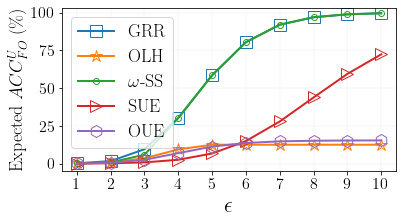

In [8]:
plt.figure(figsize=(6, 3))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.1)
plt.plot(lst_grr, label='GRR', marker='s', markerfacecolor='none')
plt.plot(lst_olh, label='OLH', marker='*', markerfacecolor='none')
plt.plot(lst_sss, label='$\omega$-SS', marker='.', markerfacecolor='none')
plt.plot(lst_sue, label='SUE', marker='>', markerfacecolor='none')
plt.plot(lst_oue, label='OUE', marker='h', markerfacecolor='none')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.xlabel('$\epsilon$', fontsize=22)
plt.ylabel('Expected $ACC_{FO}^{U}$ (\%)', fontsize=18)
plt.legend(loc='upper left')
plt.ylim(-5,103)
# plt.savefig('fig_analytical_ACC_U.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
plt.show()

## Multiple Collections (Ours): Non-Uniform Privacy Metric

In [9]:
def ACC_NU_GRR(eps, lst_k, d, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for idx in range(d_ns):
            lst_acc.append((d-idx)/d * np.exp(eps)/(np.exp(eps) + lst_ns_k[idx] - 1))            
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_NU_OLH(eps, lst_k, d, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for idx in range(d_ns):
            lst_acc.append((d-idx)/d * 1 / (2 * max(lst_ns_k[idx]/(np.exp(eps)+1) ,1) ))
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_NU_SS(eps, lst_k, d, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for idx in range(d_ns):
            k = lst_ns_k[idx]
            omega = max(np.rint(k / (np.exp(eps)+1)), 1)
            lst_acc.append((d-idx)/d * np.exp(eps) / ( omega * np.exp(eps) + k - omega))
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

def ACC_NU_SUE(eps, lst_k, d, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        
        lst_acc = []
        for idx in range(d_ns):
            k = lst_ns_k[idx]
            val = 1 / (k * (np.exp(eps/2)+1)) * (np.exp(eps/2)/(np.exp(eps/2)+1))**(k-1) + sum([ (np.exp(eps/2) / ((np.exp(eps/2)+1)*i)) * binom.pmf(k=i-1, n=k-1, p=1/(np.exp(eps/2)+1)) for i in range(1, k+1)])
            lst_acc.append((d-idx)/d * val)
        lst_perm.append(np.prod(lst_acc))
        
 
    return 100 * np.mean(lst_perm)

def ACC_NU_OUE(eps, lst_k, d, d_ns, ite=1):
    
    lst_perm = []
    for _ in range(ite):

        lst_ns_k = np.random.choice(lst_k, replace=False, size=d_ns)
        lst_acc = []
        for idx in range(d_ns):
            k = lst_ns_k[idx]
            val = 1 / (2*k) * (np.exp(eps)/(np.exp(eps)+1))**(k-1) + sum([ (1 / (2*i)) * binom.pmf(k=i-1, n=k-1, p=1/(np.exp(eps)+1)) for i in range(1, k+1)])
            lst_acc.append((d-idx)/d * val)
        lst_perm.append(np.prod(lst_acc))
 
    return 100 * np.mean(lst_perm)

## Simulation for ACC with Non-Uniform Privacy Metric

In [10]:
lst_grr = [ACC_NU_GRR(eps, lst_k, d, nb_surveys) for eps in lst_eps]
lst_olh = [ACC_NU_OLH(eps, lst_k, d, nb_surveys) for eps in lst_eps]
lst_sss = [ACC_NU_SS(eps, lst_k, d, nb_surveys) for eps in lst_eps]
lst_sue = [ACC_NU_SUE(eps, lst_k, d, nb_surveys) for eps in lst_eps]
lst_oue = [ACC_NU_OUE(eps, lst_k, d, nb_surveys) for eps in lst_eps]

## Plotting

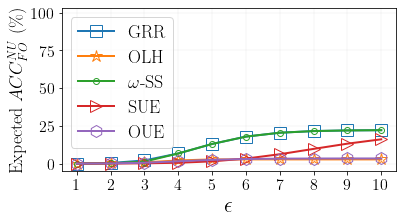

In [11]:
plt.figure(figsize=(6,3))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.1)
plt.plot(lst_grr, label='GRR', marker='s', markerfacecolor='none')
plt.plot(lst_olh, label='OLH', marker='*', markerfacecolor='none')
plt.plot(lst_sss, label='$\omega$-SS', marker='.', markerfacecolor='none')
plt.plot(lst_sue, label='SUE', marker='>', markerfacecolor='none')
plt.plot(lst_oue, label='OUE', marker='h', markerfacecolor='none')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.xlabel('$\epsilon$', fontsize=22)
plt.ylabel('Expected $ACC_{FO}^{NU}$ (\%)', fontsize=18)
plt.legend(loc='upper left')
plt.ylim(-5,103)
# plt.savefig('fig_analytical_ACC_NU.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
plt.show()